In [1]:
%matplotlib inline

import re
import os.path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In this notebook, we will explore the generated files produced from `whylogs init` in the command line interface. This file has been generated during that process and should include helpful metadata to ease exploration.


# Reading logs generated from WhyLogs CLI

Running WhyLogs will produce the following four files:
1. A flat summary file;
2. A histograms file;
3. A frequency file; and
4. A binary file containing the raw data objects

To interact with these files, we will be downloading and reading the generated profile into Pandas as dataframes.

First, let's collect needed metadata from the command line process.

In [6]:
# Here we assume you use the default .whylogs.yml in the Repo
summary_dir = "whylogs-output/demo/dataset_summary"
datetime_column = None

WhyLogs calculates and displays a number of metrics for the data that passes through. The carefully chosen metrics balance efficient storage and in-depth analysis of your data.

In [8]:
flat_summary = pd.read_csv(os.path.join(summary_dir, "flat_table", "dataset_summary-batch.csv"))
flat_summary

,column,count,null_count,bool_count,numeric_count,max,mean,min,stddev,nunique_numbers,...,ununique_str_upper,quantile_0.0000,quantile_0.0100,quantile_0.0500,quantile_0.2500,quantile_0.5000,quantile_0.7500,quantile_0.9500,quantile_0.9900,quantile_1.0000
0,tot_coll_amt,100.0,0.0,0.0,100.0,3841.00,107.030000,0.00,497.942381,12.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,468.00,3841.000000,3841.000000
1,acc_now_delinq,100.0,0.0,0.0,100.0,0.00,0.000000,0.00,0.000000,1.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000
2,last_pymnt_d,100.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.000000,0.0,...,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,dti,100.0,0.0,0.0,100.0,43.37,17.984900,1.06,8.119739,99.0,...,0.0,1.06,1.44,4.95,12.89,17.92,23.93,30.99,43.369999,43.369999
4,num_rev_tl_bal_gt_0,100.0,0.0,0.0,100.0,19.00,5.270000,0.00,3.221942,15.0,...,0.0,0.00,1.00,2.00,3.00,5.00,7.00,11.00,19.000000,19.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,disbursement_method,100.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.000000,0.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,mths_since_last_delinq,100.0,0.0,0.0,45.0,79.00,36.711111,2.00,22.010971,33.0,...,0.0,2.00,2.00,3.00,18.00,37.00,50.00,76.00,79.000000,79.000000
147,title,100.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.000000,0.0,...,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,sec_app_inq_last_6mths,100.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.000000,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The flat summary file contains a summary of each variable of the dataset. It contains metrics that include descriptive statistics as well as metrics specifically for numeric, text, and categorical variables.

Let's look at the available variables from the dataset that are logged in the profile's flat_summary.

In [9]:
# Print available variables for flat_summary
print(flat_summary["column"].unique())

['tot_coll_amt' 'acc_now_delinq' 'last_pymnt_d' 'dti'
 'num_rev_tl_bal_gt_0' 'open_acc_6m' 'avg_cur_bal' 'desc' 'all_util'
 'last_credit_pull_d' 'num_actv_bc_tl' 'mths_since_rcnt_il'
 'sec_app_open_acc' 'total_pymnt_inv' 'total_rec_prncp' 'sub_grade'
 'mths_since_recent_bc_dlq' 'sec_app_fico_range_high' 'deferral_term'
 'grade' 'out_prncp_inv' 'collection_recovery_fee' 'last_pymnt_amnt'
 'mo_sin_old_rev_tl_op' 'open_acc' 'last_fico_range_low' 'inq_fi'
 'earliest_cr_line' 'pymnt_plan' 'purpose' 'mths_since_last_major_derog'
 'mo_sin_rcnt_rev_tl_op' 'verification_status' 'open_il_24m'
 'orig_projected_additional_accrued_interest' 'total_il_high_credit_limit'
 'settlement_percentage' 'pub_rec_bankruptcies' 'sec_app_fico_range_low'
 'pub_rec' 'percent_bc_gt_75' 'bc_util' 'revol_bal_joint'
 'annual_inc_joint' 'sec_app_mort_acc' 'inq_last_6mths' 'open_act_il'
 'hardship_loan_status' 'il_util' 'open_rv_24m' 'num_op_rev_tl'
 'fico_range_low' 'next_pymnt_d' 'settlement_term' 'hardship_dpd'
 'ha

Choose one variable to do a deep dive.

In [10]:
# Filter flat_summary to the desired variable
variable = "mths_since_last_record"
data = flat_summary[flat_summary["column"]==variable]

The inferred variable type metrics can tell us a lot about errors that may occur in the process.

In [11]:
# Print data type percentage
print("Percentage of data in inferred data type:", data["inferred_dtype"].values)

Percentage of data in inferred data type: [2.]


Let's look at some metrics that hold type count information.

In [12]:
# List all type count metrics
regex = re.compile("type_(.*)_count")
metrics = list(filter(regex.match, flat_summary.columns))

We can display this information using whichever visualization tools you are used to. Below is a simple chart created in `matplotlib`.

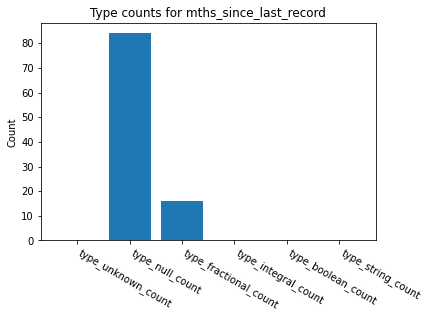

In [13]:
# Display all type count metrics using matplotlib
x = [i for i, _ in enumerate(metrics)]
fig, ax = plt.subplots()
plt.bar(x, np.squeeze(data[metrics].values))
plt.title("Type counts for "+variable)
plt.ylabel("Count")
plt.xticks(x, metrics)
plt.setp(ax.get_xticklabels(), rotation=-30, horizontalalignment='left')
plt.show()

In addition to the type metrics, there are loads of other useful metrics in the WhyLogs summaries. These include but are not limited to descriptive statistics, estimations with error intervals, and metrics related to missing values.

In [14]:
metrics = flat_summary.columns
print(metrics)

Index(['column', 'count', 'null_count', 'bool_count', 'numeric_count', 'max',
       'mean', 'min', 'stddev', 'nunique_numbers', 'nunique_numbers_lower',
       'nunique_numbers_upper', 'inferred_dtype', 'dtype_fraction',
       'type_unknown_count', 'type_null_count', 'type_fractional_count',
       'type_integral_count', 'type_boolean_count', 'type_string_count',
       'nunique_str', 'nunique_str_lower', 'ununique_str_upper',
       'quantile_0.0000', 'quantile_0.0100', 'quantile_0.0500',
       'quantile_0.2500', 'quantile_0.5000', 'quantile_0.7500',
       'quantile_0.9500', 'quantile_0.9900', 'quantile_1.0000'],
      dtype='object')


There are many more visualizations one might generate from the flat_summary file.

Let's move onto the histogram file. The histogram file contains information for numeric variables that allow us to create histograms and analyze distribution.

We'll grab the data for another variable and plot it.

In [16]:
histograms = pd.read_json(os.path.join(summary_dir, "histogram", "dataset_summary-batch.json"))

In [17]:
# Print valid variables for histograms
print(histograms.keys())

Index(['tot_coll_amt', 'acc_now_delinq', 'dti', 'num_rev_tl_bal_gt_0',
       'open_acc_6m', 'avg_cur_bal', 'all_util', 'num_actv_bc_tl',
       'mths_since_rcnt_il', 'total_pymnt_inv', 'total_rec_prncp',
       'mths_since_recent_bc_dlq', 'out_prncp_inv', 'collection_recovery_fee',
       'last_pymnt_amnt', 'mo_sin_old_rev_tl_op', 'open_acc',
       'last_fico_range_low', 'inq_fi', 'mths_since_last_major_derog',
       'mo_sin_rcnt_rev_tl_op', 'open_il_24m', 'total_il_high_credit_limit',
       'pub_rec_bankruptcies', 'pub_rec', 'percent_bc_gt_75', 'bc_util',
       'annual_inc_joint', 'inq_last_6mths', 'open_act_il', 'il_util',
       'open_rv_24m', 'num_op_rev_tl', 'fico_range_low',
       'chargeoff_within_12_mths', 'num_il_tl', 'delinq_amnt',
       'mths_since_recent_inq', 'tax_liens', 'last_fico_range_high',
       'mths_since_recent_bc', 'bc_open_to_buy', 'total_rev_hi_lim',
       'delinq_2yrs', 'num_actv_rev_tl', 'inq_last_12m', 'revol_util',
       'revol_bal', 'tot_hi_cred_

In [18]:
# Filter flat_summary to the desired variable
variable = "mths_since_last_record"

We can display this information from the histogram.

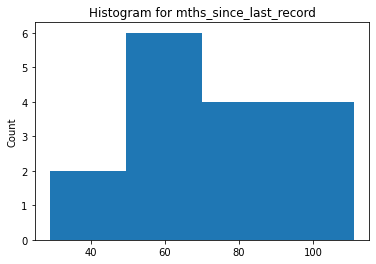

In [19]:
# See one of the inspected histograms
bins = histograms[variable]['bin_edges']
n = histograms[variable]['counts']
bin_width = np.diff(bins)

plt.bar(bins[0:-1], n, bin_width, align='edge')
plt.title("Histogram for "+variable)
plt.ylabel("Count")
plt.show()

Finally, we have more detailed information on the frequencies of many variables in the dataset. These can be accessed through the generated frequencies file.

In [24]:
!tree {summary_dir}

whylogs-output/demo/dataset_summary
├── flat_table
│   └── dataset_summary-batch.csv
├── freq_numbers
│   └── dataset_summary-batch.json
├── frequent_strings
│   └── dataset_summary-batch.json
├── histogram
│   └── dataset_summary-batch.json
└── json
    └── dataset_summary-batch.json

5 directories, 5 files


In [25]:
!cat {summary_dir}/frequent_strings/dataset_summary-batch.json

{
    "last_pymnt_d": {
        "Dec-2017": 59,
        "Nov-2017": 15,
        "Mar-2017": 8,
        "Apr-2017": 4,
        "May-2017": 3,
        "Jul-2017": 3,
        "Oct-2017": 3,
        "Aug-2017": 3,
        "Feb-2017": 2
    },
    "last_credit_pull_d": {
        "Dec-2017": 81,
        "Oct-2017": 4,
        "Aug-2017": 3,
        "Sep-2017": 2,
        "Nov-2017": 2,
        "Jun-2017": 2,
        "Jul-2017": 2,
        "Mar-2017": 2,
        "Apr-2017": 1,
        "Feb-2017": 1
    },
    "sub_grade": {
        "C5": 11,
        "C3": 9,
        "C4": 7,
        "B1": 7,
        "B5": 7,
        "B3": 6,
        "B2": 6,
        "C1": 5,
        "E1": 5,
        "C2": 5,
        "A4": 5,
        "B4": 5
    },
    "grade": {
        "C": 37,
        "B": 31,
        "A": 17,
        "E": 7,
        "D": 6,
        "F": 1,
        "G": 1
    },
    "earliest_cr_line": {
        "Jul-2007": 5,
        "Aug-2001": 5,
        "May-2005": 5,
        "Jul-2003": 4,
        "Jun